# Temperatursensor-Projekt  
<a id='temSens'></a>

## 1. Einführung

### Projektziel
Das Ziel dieses Projekts ist es, die Temperatur mithilfe eines [BME680-Sensors](https://www.bosch-sensortec.com/products/environmental-sensors/gas-sensors/bme680/) und eines [Raspberry Pi](../RaspberryPi_Jupyter_Grundlagen.ipynb#grundlagen) zu messen und die Daten in [Jupyter Notebook](../RaspberryPi_Jupyter_Grundlagen.ipynb#grundlagen) darzustellen. Dieses Projekt umfasst die Hardware-Schaltung, die Konfiguration des Raspberry Pi, die Programmierung in [Python]((https://www.python.org/about/gettingstarted/)) und die Visualisierung der Temperaturdaten. Es soll ein grundlegendes Verständnis für die Verwendung von Temperatursensoren, [GPIO-Pins](./Bilder/Raspberry_Pi_5_GPIO-Pinout.png) und die Datenverarbeitung in Python vermitteln.

### Hintergrund
Der [BME680](./Bilder/BME680.jpg) ist ein Sensor, der Temperatur, Luftfeuchtigkeit, Luftdruck und Luftqualität misst. Er ist besonders nützlich für Umweltüberwachungsprojekte.  
Der [Raspberry Pi](https://www.raspberrypi.com/documentation/) ist ein kostengünstiger Einplatinencomputer, der häufig in Bildungs- und Hobbyprojekten verwendet wird. Durch die Kombination dieser beiden Komponenten können wir ein einfaches und effektives System zur Temperaturmessung und -überwachung erstellen.

### Relevanz
Mit der zunehmenden Bedeutung der Umweltüberwachung sind kostengünstige und effektive Lösungen zur Datenerfassung und -analyse erforderlich. Das hier vorgestellte Projekt kann in verschiedenen Bereichen wie Smart Home, Wetterstationen und wissenschaftlichen Untersuchungen eingesetzt werden.

## 2. Grunlagen und Theorie
Der BME680-Sensor verwendet die [MEMS-Technologie (Micro-Electro-Mechanical Systems)](https://de.wikipedia.org/wiki/Mikrosystem_(Technik)), um genaue Messungen von Temperatur, Luftfeuchtigkeit, Luftdruck und Luftqualität durchzuführen. Er kommuniziert über [I2C](https://www.fs-pcba.com/de/spi-vs-i2c/) oder [SPI](https://www.fs-pcba.com/de/spi-vs-i2c/) mit dem Raspberry Pi, wobei I2C in diesem Projekt verwendet wird. Hier geht es hauptsächlich um den BME680 Sensor, wird aber mit [BME280](https://www.bosch-sensortec.com/products/environmental-sensors/humidity-sensors-bme280/) verglichen.

### Was ist MEMS-Technologie ?
MEMS-Technologie in Temperatursensoren kombiniert Mikroelektromechanische Systeme (MEMS) mit traditionellen Temperaturmessmethoden. Diese Technologie ermöglicht es, Temperatursensoren in sehr kleinen, energieeffizienten und kostengünstigen Formaten herzustellen. MEMS-basierte Temperatursensoren nutzen mikrostrukturierte mechanische und elektrische Komponenten, um Temperaturänderungen präzise zu erfassen und in elektrische Signale umzuwandeln.

### Nutzliche Links zu MEMS-Technologie
- [Mikro-Elektronisch-Mechanische-Systeme einfach erklärt ](https://www.conrad.de/de/ratgeber/industrie-40/mems.html?msockid=3c74d2b8db826328021dc6ccda0962f6)  
- [MEMS-Sensoren – Technologie für eine intelligente Welt](https://www.bosch.com/de/forschung/forschungsschwerpunkte/automatisierung/forschung-zu-intelligenten-sensoren-und-hmi-technologien/mems-sensoren-technologie-fuer-eine-intelligente-welt/)

### Was ist SPI und I2C Schnittstellen ?
Kommunikationsprotokolle, die verwendet werden, um Daten zwischen Mikrocontrollern und verschiedenen Peripheriegeräten wie Sensoren, Displays, Speicherchips und anderen elektronischen Bauteilen auszutauschen. Beide Schnittstellen sind in der Embedded-Entwicklung weit verbreitet, aber sie haben unterschiedliche Eigenschaften und Einsatzgebiete.

- SPI ist ein vollduplexes, synchrone Kommunikationsprotokoll, das häufig verwendet wird, wenn schnelle Datenübertragung und eine direkte Steuerung der Kommunikation zwischen Geräten erforderlich ist.

- I²C ist ein Halbduplex-Kommunikationsprotokoll, das hauptsächlich für die Verbindung von Geräten auf einem Board verwendet wird und besonders gut für die Kommunikation zwischen mehreren Slaves geeignet ist.

### Nutzliche Link zu SPI und I²C
- [SPI vs I2C: So wählen Sie das beste Protokoll für Ihre Speicherchips](https://resources.altium.com/de/p/spi-versus-i2c-how-choose-best-protocol-your-memory-chips)
- [SPI vs I2C Communication Protocols](https://www.fs-pcba.com/de/spi-vs-i2c/)


## 3. Materialien und Werkzeuge

### Zusätzliche Software
- [Raspbian OS](../Rasp_Pi_Einrichtung.ipynb#rasbioanOS)
- [Python 3](https://www.python.org/about/gettingstarted/)
- [Jupyter Notebook](../RaspberryPi_Jupyter_Grundlagen.ipynb)
- [Bibliotheken](../Installationen.ipynb)

### Zusätzliche Hardware
- Raspberry Pi 5 Model B Rev 1.0
- BME680 und BME280
- Breadboard
- Jumper-Kabel
- Stromversorgung für den Raspberry Pi

### Einführung in Jupyter Notebook und Raspberry Pi
- Klicken Sie [hier](../RaspberryPi_Jupyter_Grundlagen.ipynb), um ins Einführung-Notebbok zu springen.

### Sensoren/Aktoren, inkl. Datenblätter
- Versorgungsspannung: 1.7V bis 3.6V
- Stromverbrauch: 3.1 µA im Forced-Modus (Temperatur und Druckmessung)
- Messbereich: -40°C bis +85°C
- Genauigkeit: ±1.0°C
- Auflösung: 0.01°C

### Datenblatt
- [BME680](https://www.bosch-sensortec.com/media/boschsensortec/downloads/datasheets/bst-bme680-ds001.pdf)

### Bus
Der BME680-Sensor von Bosch Sensortec unterstützt zwei Kommunikationsschnittstellen:
- [I2C](https://www.fs-pcba.com/de/spi-vs-i2c/) (bis zu 3.4 MHz)
- [SPI](https://www.fs-pcba.com/de/spi-vs-i2c/) (bis zu 10 MHz).

Für die meisten einfachen Projekte und speziell bei der Nutzung von mehreren Sensoren gleichzeitig wird häufig die I2C-Schnittstelle bevorzugt, da sie weniger [GPIO-Pins](./Bilder/Raspberry_Pi_5_GPIO-Pinout.png) benötigt und einfach zu konfigurieren ist.

#### Übung
Welche PINs bieten die Schnittstellen I2C und SPI?  
Tipp: Gucken Sie sich das [Pinot](./Bilder/Raspberry_Pi_5_GPIO-Pinout.png) von Raspberry Pi an.

### Pin Beschaltung
- VCC des BME680  an 3.3V des Raspberry Pi
- GND des BME680 an GND des Raspberry Pi
- SCL des BME680 an SCL des Raspberry Pi (GPIO 5)
- SDA des BME680 an SDA des Raspberry Pi (GPIO 3)

- [Anschluss des Sensors BME680](https://botland.de/blog/projekte-mit-dem-raspberry-pi-anschluss-des-sensors-bme680-2/)

### Was ist SDA und SCL ?
- SCL (Serial Clock Line) ist die Taktleitung, die vom Master (meistens der Mikrocontroller) bereitgestellt wird. Der Master steuert die Taktfrequenz und synchronisiert so die Übertragung der Daten zwischen den Geräten.

- SDA (Serial Data Line) ist die Datenleitung, auf der sowohl der Master als auch der Slave (in diesem Fall der Temperatursensor) Daten senden und empfangen können. Über diese Leitung werden die Daten seriell bitweise übertragen.

- [SDA und SCL](https://botland.de/blog/i2c-bus-was-ist-das-und-wofuer-wird-er-verwendet/#:~:text=Die%20mit%20SCL%20bezeichnete%20Leitung%20dient%20der%20%C3%9Cbertragung,entsprechenden%20Informationen%20zwischen%20den%20kooperierenden%20Schaltkreisen%20zust%C3%A4ndig%20ist).

### Zusätzliche Berechnungen
Ein Vorwiderstand ist nicht erforderlich, da der Sensor direkt an den Raspberry Pi angeschlossen wird.

### Komponentenauswahl
- **BME680 Sensor:** Die Auswahl des [BME680](https://www.bosch-sensortec.com/media/boschsensortec/downloads/datasheets/bst-bme680-ds001.pdf) basiert auf seiner Fähigkeit, mehrere Umweltparameter mit hoher Genauigkeit zu messen.

## 4. Schaltungsdesign

### Schaltplan  
So sieht der einfachste Schaltplan des Sensors in Raspberry Pi aus.  

<img src="Bilder/schaltplan.png" style="width:400px;">  

Diese Schaltung wurde durch [circuito.io](https://www.circuito.io/app?components=9443,164792,200000) erstellt.

**Alternativ**  
Eine Alternativität bietet sich durch das folgende Bild, das die Schaltung und PINs deutlich und klar zeigt.  

<img src="Bilder/Raspberry_Pi_5_BME680.png" alt="BME680" style="width:400px;">  
  
Diese Schaltung wurd durch [easyeda](https://easyeda.com/editor) erstellt.

## 5. Implementierung

### Hardware-Aufbau
- Verbinden Sie den BME680-Sensor gemäß der oben genannten Pin-Beschaltung mit dem Raspberry Pi.
- Stellen Sie sicher, dass der Raspberry Pi durch an Ihren Rechner angeschlossenes USB mit Strom versorgt wird.

### Software-Setup
1. Raspbian OS [installieren](../Rasp_Pi_Einrichtung.ipynb#rasbioanOS).
2. Python und Jupyter Notebook [installieren](../Installationen.ipynb#installationen).

Zusätzliche für dieses Notebook benötigte Installationen:  
[smbus](https://www.abelectronics.co.uk/kb/article/1094/i2c-part-4-programming-i2c-with-python), [adafruit](https://learn.adafruit.com/adafruit-motor-shield-v2-for-arduino/library-reference) und [matplotlib](../Installationen.ipynb).

In [ ]:
!pip3 install adafruit-circuitpython-bme680

### Code

### Bibliotheken Installieren
In diesem Beispiel wird die [`adafruit-circuitpython`](https://learn.adafruit.com/adafruit-neotrellis/circuitpython-code) und "smbus" benutzt.

### Was ist adafruit-circuitpython ?
CircuitPython ist eine einfach zu verwendende Programmiersprache, die auf Python basiert und speziell für Mikrocontroller entwickelt wurde. Adafruit hat diese Version von Python entwickelt, um die Programmierung von Mikrocontrollern (z.B. Raspberry Pi, Arduino, ESP32) zu vereinfachen.

- [CircuitPython & Python](https://learn.adafruit.com/adafruit-neotrellis/circuitpython-code)  
- [Adafruit Library Reference](https://learn.adafruit.com/adafruit-motor-shield-v2-for-arduino/library-reference)
- [Leg los mit CircuitPython](https://polluxlabs.net/circuitpython/leg-los-mit-circuitpython/)
- [CircuitPython](https://docs.circuitpython.org/en/latest/README.html)

#### Was ist smbus
SMBus ist ein einfaches Kommunikationsprotokoll, das auf I²C (Inter-Integrated Circuit) basiert und ursprünglich für die Systemverwaltung in Computern entwickelt wurde. Es ermöglicht die Kommunikation zwischen einem Host und verschiedenen Peripheriegeräten (z.B. Sensoren).

- [Was ist ein SM-Bus-Controller?](https://praxistipps.chip.de/was-ist-ein-sm-bus-controller_10140)
- [System Management Bus](https://de.wikipedia.org/wiki/System_Management_Bus)

##### Installation von smbus  
Führen  Sie den folgenden Befehel hier direkt auf Jupyter, um smbus zu installieren.

In [ ]:
!sudo apt-get install -y python3-pip python3-smbus i2c-tools

##### Installtion von adafruit:  
Führen  Sie den folgenden Befehel hier direkt auf Jupyter, um adafruit zu installieren.

In [ ]:
!pip3 install adafruit-circuitpython-bme680

Installation von [board](https://docs.circuitpython.org/en/latest/shared-bindings/board/):  

Führen  Sie den folgenden Befehel hier direkt auf Jupyter, um board zu installieren.


In [ ]:
!pip3 install adafruit-blinka

In [ ]:
### Bibliotheken importieren
import time
from board import *
import busio
import adafruit_bme680

# I2C initialisieren
i2c = busio.I2C(SCL, SDA)

# BME680 Sensor initialisieren
bme680 = adafruit_bme680.Adafruit_BME680_I2C(i2c)

# Optional: Offset für die Umgebungstemperatur anpassen
bme680.sea_level_pressure = 1013.25

# Liste zum Speichern der Temperaturwerte
temperaturen = []

# Dauer für die Datensammlung in Sekunden
duration = 60
start_time = time.time()

while time.time() - start_time < duration:
    # Messe die Temperatur
    bme680.get_sensor_data()
    temperature = bme680.temperature
    
    # Füge die Temperatur zur Liste hinzu
    temperaturen.append(temperature)
    
    # Zeige die Temperatur an
    print(f"Temperatur: {temperature:.2f} °C")
    
    # Warte 2 Sekunden vor der nächsten Messung
    time.sleep(2)

### Sea Level Pressure (SLP)
Der Begriff Meeresspiegeldruck oder Sea Level Pressure (SLP) bezieht sich auf den Luftdruck, der auf Meereshöhe gemessen oder berechnet wird.

- [SLP_Erkärung]([https://www.helpster.de/luftdruck-auf-meereshoehe-informatives_205984)

### Append
In Python ist append eine Methode, die auf Listen angewendet wird. Sie fügt ein neues Element am Ende einer Liste hinzu.
- [Append_Tutorial](https://realpython.com/python-append/)
- [Append_Übung](https://www.w3schools.com/python/ref_list_append.asp)

## 6. Experimente und Ergebnisse

### Ergebnisse

#### Darstellung in Matplotlib und Berechnung des Mittelwerts und Ungenauigkeit der BME680 Daten
Um die Ergebnisse in Matplotlib darstellen zu können, werden die Bibliotheken **matplotlib** , **pandas** und **statistics** benutzt.
Matplotlib und Pandas sind zwei weit verbreitete Python-Bibliotheken, die häufig für Datenanalyse und -visualisierung verwendet werden.

Die Bibliothek statistics bietet eine Sammlung von Funktionen zur Berechnung statistischer Eigenschaften von Daten. Sie ermöglicht es, grundlegende statistische Operationen durchzuführen.

### Nutzliche Links zu Matplotlib
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html)
- [Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)

### Nutzliche Links zu Pandas
- [Python pandas tutorial](https://www.datacamp.com/tutorial/pandas)
- [User Guide](https://pandas.pydata.org/docs/user_guide/index.html)

### Nutzliche Links zu Statistics
- [Statistics tutorial](https://realpython.com/python-statistics/)
- [Statistics](https://docs.python.org/3/library/statistics.html)

In [ ]:
# Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import statistics
    
# Mittelwert und Standardabweichung berechnen
mean_temperature = statistics.mean(temperaturen)
std_deviation = statistics.stdev(temperaturen)

# Ergebnisse anzeigen
print(f"\nMittelwert der Temperatur: {mean_temperature:.2f} °C")
print(f"Standardabweichung (Ungenauigkeit): {std_deviation:.2f} °C")

# Schritt 3: Erstelle ein Pandas DataFrame aus der Liste
def zeichne_temperaturverlauf(temperaturen, title='Temperaturverlauf', xlabel='Messungen', ylabel='Temperatur (°C)'):
    # Erstelle eine x-Achse basierend auf der Anzahl der Temperaturen
    x_werte = list(range(len(temperaturen)))
    
    # Diagramm erstellen
    plt.figure(figsize=(10, 5))
    plt.plot(x_werte, temperaturen, marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
zeichne_temperaturverlauf(temperaturen)

**statistics.mean():** Diese Funktion berechnet den arithmetischen Mittelwert (Durchschnitt) einer Gruppe von Zahlen.

**statistics.stdev():** Diese Funktion berechnet die Standardabweichung einer Gruppe von Zahlen. Die Standardabweichung ist ein Maß dafür, wie stark die Werte in einer Datenmenge um den Mittelwert streuen.

[Standard_Deviation und Mean](https://www.askpython.com/python/examples/mean-and-standard-deviation-python)

#### Übung
Finden Sie heraus, wie der Mittelwert und die Standardabweichung mathematisch berechnet werden können.

### Expriment:
Vergleich zwischen den gemessenen Daten der BME680 und BME280 Sensoren

### Installation der Bibliotheken
in diesem Versuch wird auch die gleichen Bibliotheken benutzt aber **adafruit-circuitpython-bme280** soll statt **adafruit-circuitpython-bme680** installiert werden.

### Installation von adafruit auf Jupyter Notebook


In [ ]:
!pip3 install adafruit-circuitpython-bme280

### Code zum Testen

In [5]:
import time
from board import *
import busio
import adafruit_bme280

# I2C initialisieren
i2c = busio.I2C(board.SCL, board.SDA)

# BME280 Sensor initialisieren
bme280 = adafruit_bme280.Adafruit_BME280_I2C(i2c)

# Liste zum Speichern der Temperaturwerte
temperature_data = []

# Dauer für die Datensammlung in Sekunden
duration = 30
start_time = time.time()

while time.time() - start_time < duration:
    # Messe die Temperatur
    temperature = bme280.temperature
    
    # Füge die Temperatur zur Liste hinzu
    temperature_data.append(temperature)
    
    # Zeige die Temperatur an
    print(f"Temperatur: {temperature:.2f} °C")
    
    # Warte 2 Sekunden vor der nächsten Messung
    time.sleep(2)

**Temperature:** 22.98 °C

**Temperature:** 22.71 °C

**Temperature:** 22.69 °C

**Temperature:** 22.66 °C

**Temperature:** 22.74 °C

**Temperature:** 22.57 °C

**Temperature:** 22.76 °C

**Temperature:** 22.83 °C

**Temperature:** 22.83 °C

**Temperature:** 22.66 °C

**Temperature:** 22.64 °C

**Temperature:** 22.62 °C

**Temperature:** 22.56 °C

**Temperature:** 22.74 °C

**Temperature:** 22.94 °C

### Darstellung in  Matplotlib

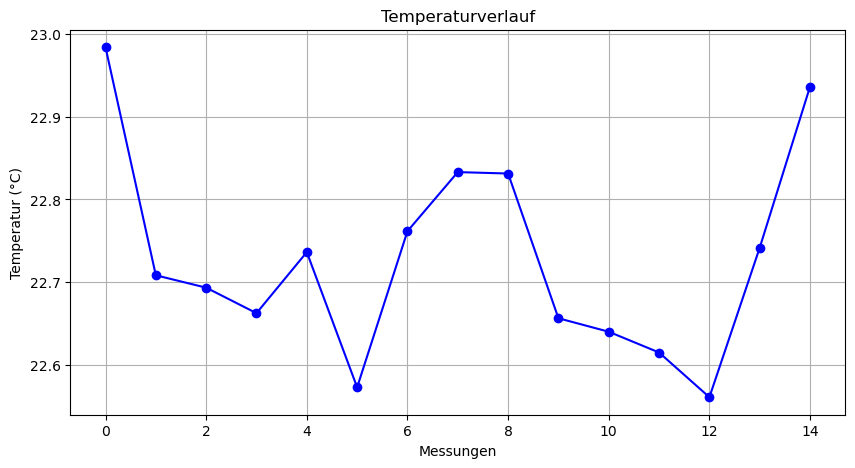

In [31]:
import matplotlib.pyplot as plt
import statistics

# Erstelle eine x-Achse basierend auf der Anzahl der Temperaturen
zeichne_temperaturverlauf(temperature_data)

### Aufgabe
Versuchen Sie den Mittelwert und die  Ungenauigkeit der BME280 Daten zu berechnen und das Ergebnis mit dem Ergebnis von BME680 zu vergleichen.

## 7. Diskussion und Fazit

### Diskussion
Die Temperaturmessung mit dem BME680-Sensor und dem Raspberry Pi ist relativ einfach und liefert genaue Ergebnisse. Der Einsatz von Jupyter Notebook ermöglicht eine interaktive und benutzerfreundliche Darstellung der Daten. Eine mögliche Herausforderung könnte die Kalibrierung und Validierung der Messdaten sein, insbesondere in Umgebungen mit extremen Temperaturen.
Dieses Projekt zeigt, wie man einen Temperatursensor mit einem Raspberry Pi verwendet. Es bietet eine gute Grundlage, um die GPIO-Pins des Raspberry Pi und die Datenverarbeitung in Python kennenzulernen. Die Ergebnisse sind vielversprechend und das Projekt kann leicht erweitert werden, um komplexere Systeme zur Umweltdatenmessung zu entwickeln.